In [1]:
# Uncomment and run if you do not have these packages installed or are outdated
#!pip install scikit-learn --upgrade

# Density Based Clustering

Density based clustering does not assumes an specific shape for the data, let's see wen we use data that does not fit into spherical clusters, for example an image

In [2]:
from sklearn.datasets import load_sample_image
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

We will transform the image into a dataset including the coordinates of the pixels and their RGB values

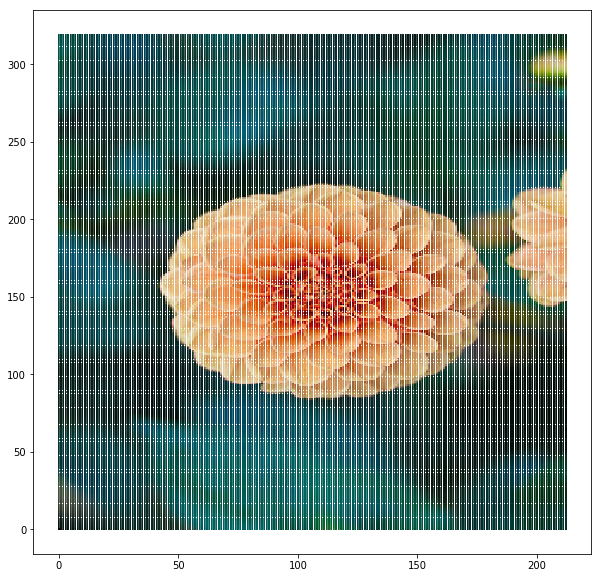

In [3]:
colors = 'rgbymc'
# you can use 'flower' or 'china' images
flower = load_sample_image('flower.jpg')
mdata = np.zeros((int(flower.shape[0]*flower.shape[1]/4.0), flower.shape[2]+2))
cc=0
for i in range(0,flower.shape[0]-1,2):
    for j in range(0,flower.shape[1]-1,2):
        mdata[cc][0] = i/2
        mdata[cc][1] = j/2
        for k in range(flower.shape[2]):
            mdata[cc][2+k] = flower[i, j, k]
        cc += 1
plt.figure(figsize=(10,10))
plt.scatter(mdata[:, 0], mdata[:, 1], c=mdata[:, 2:]/255.0, s=2, marker='+');

This is what happens using K-means looking for 3 classes using the coordinates and the color

In [4]:
@interact(nc = (2, 10, 1))
def g(nc=3):
    km = KMeans(n_clusters=nc, n_jobs=-1)
    labels = km.fit_predict(mdata)
    plt.figure(figsize=(10,10))
    plt.scatter(mdata[:, 0], mdata[:, 1], c=np.array(labels)/len(np.unique(labels)), s=2, marker='+');

interactive(children=(IntSlider(value=3, description='nc', max=10, min=2), Output()), _dom_classes=('widget-in…

Now we will cluster only the colors (we are applying vector quantization to the colors palette). You can play with the number of clusters to see how the cluster colors get closer to the original colors.

In [6]:
@interact(nc = (2, 10, 1))
def g(nc=3):
    km = KMeans(n_clusters=nc, n_jobs=-1)
    labels = km.fit_predict(mdata[:,2:])
    ccent = km.cluster_centers_/255.0
    lcols = [ccent[l,:] for l in labels]
    plt.figure(figsize=(10,10))
    plt.scatter(mdata[:, 0], mdata[:, 1], c=lcols, s=2, marker='+')

interactive(children=(IntSlider(value=3, description='nc', max=10, min=2), Output()), _dom_classes=('widget-in…

Using or not the coordinates obviously has an effect on the result

For DBSCAN we will also use coordinates and colors, now to select the parameters is more complex and different parameters will yield very different results.

In [7]:
@interact(eps = (5, 50, 5), ms = (20, 200, 10))
def g(eps=25, ms=100):
    dbs = DBSCAN(eps=eps, min_samples=ms)
    labels = dbs.fit_predict(mdata)
    unq = len(np.unique(labels))
    print("NClusters", unq-1)
    ecolors = np.array(labels)
    ecolors[ecolors == -1] += unq+25
    plt.figure(figsize=(10,10))
    plt.scatter(mdata[:, 0], mdata[:, 1], c=ecolors/unq+25, s=2, marker='+');

interactive(children=(IntSlider(value=25, description='eps', max=50, min=5, step=5), IntSlider(value=100, desc…